# Multiclass Classification

This example will show you how to use the different methods of a Multiclass Classifier. We will use the Iris dataset.

In [31]:
from vertica_ml_python.learn.datasets import load_iris
iris = load_iris()
print(iris)

,PetalLengthCm,SepalWidthCm,SepalLengthCm,Species,PetalWidthCm
0,1.10,3.00,4.30,Iris-setosa,0.10
1,1.40,2.90,4.40,Iris-setosa,0.20
2,1.30,3.00,4.40,Iris-setosa,0.20
3,1.30,3.20,4.40,Iris-setosa,0.20
4,1.30,2.30,4.50,Iris-setosa,0.30
,...,...,...,...,...


<object>  Name: iris, Number of rows: 150, Number of columns: 5


Let's create a Random Forest to predict the Flower Species.

In [35]:
from vertica_ml_python.learn.ensemble import RandomForestClassifier
model = RandomForestClassifier("public.RF_iris")
model.fit("public.iris", 
          ["PetalLengthCm", "SepalWidthCm", "SepalLengthCm", "PetalWidthCm"], 
          "Species")



call_string
SELECT rf_classifier('public.RF_iris', 'public.iris', '"species"', '"PetalLengthCm", "SepalWidthCm", "SepalLengthCm", "PetalWidthCm"' USING PARAMETERS exclude_columns='', ntree=10, mtry=2, sampling_size=0.632, max_depth=5, max_breadth=1000000000, min_leaf_size=1, min_info_gain=0, nbins=32);

details
  predictor  |      type      
-------------+----------------
petallengthcm|float or numeric
sepalwidthcm |float or numeric
sepallengthcm|float or numeric
petalwidthcm |float or numeric


Additional Info
       Name       |Value
------------------+-----
    tree_count    | 10  
rejected_row_count|  0  
accepted_row_count| 150 

By fitting the model, new model's attributes will be created. These attributes will be used to simplify the methods usage. 

In [36]:
model.X

['"PetalLengthCm"', '"SepalWidthCm"', '"SepalLengthCm"', '"PetalWidthCm"']

In [37]:
model.y

'"Species"'

In [38]:
model.input_relation

'public.iris'

In [39]:
model.test_relation

'public.iris'

In our case, we did not write the test relation when fitting the model. The model will then consider the train relation as test. These attributes will be used when invoking the different model abstractions. For example, let's compute the accuracy of the model.

In [40]:
model.score(method = "accuracy")

1.0

The 'score' method is using the attribute 'y' and the model prediction in the 'test_relation' to compute the accuracy. It is then possible to change them anytime to deploy the models on different columns. The model could also have other useful attributes. In the case of Random Forest, the 'classes' attribute is the list of the response categories.

In [41]:
model.classes

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Many abstraction can help you drawing model evaluation curves like PRC, ROC or Lift Chart. But as it is a multiclass classification, one of the class must be considered as positive. The parameter pos_label will represent this class. Let's consider the 'Iris-setosa' as the positive class.

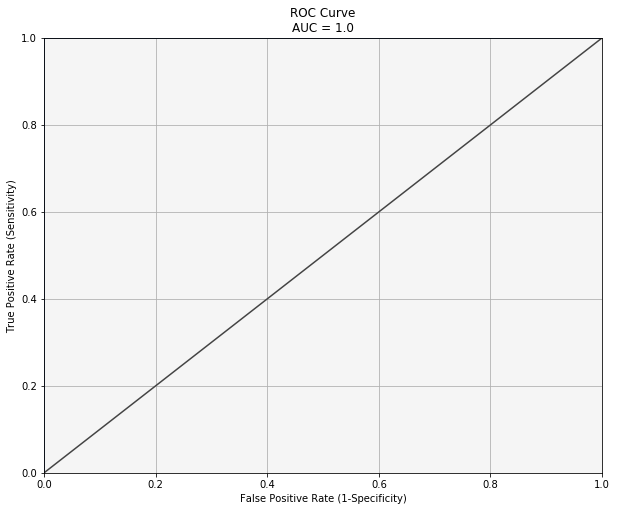

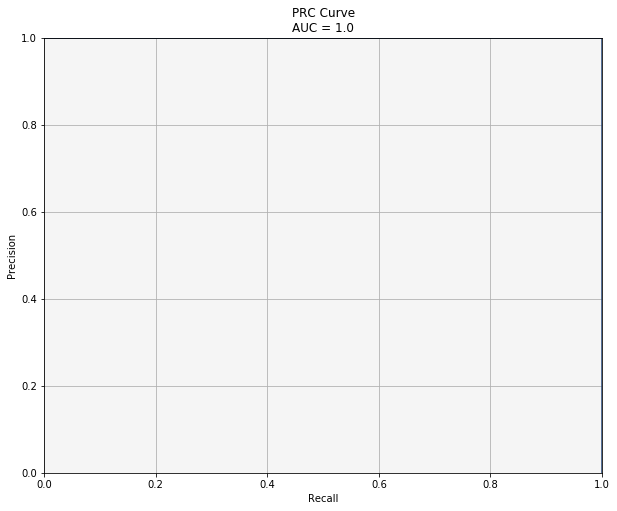

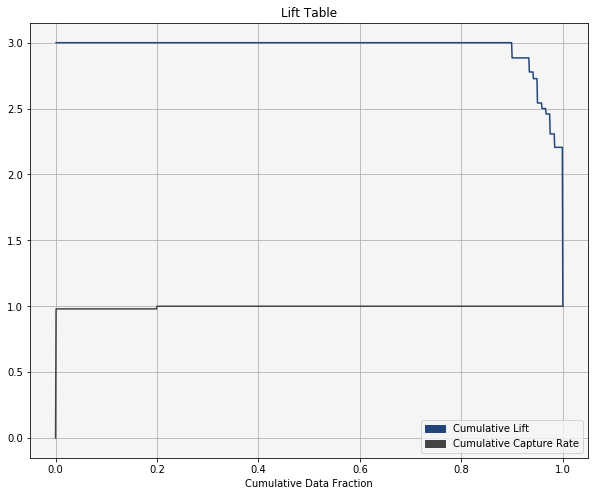

In [44]:
model.roc_curve(pos_label = 'Iris-setosa')
model.prc_curve(pos_label = 'Iris-setosa')
model.lift_chart(pos_label = 'Iris-setosa')

Looking at the SQL code can help you understand how Vertica works.

In [45]:
print(model.deploySQL())

PREDICT_RF_CLASSIFIER("PetalLengthCm", "SepalWidthCm", "SepalLengthCm", "PetalWidthCm" USING PARAMETERS model_name = 'public.RF_iris', match_by_pos = 'true')


The classification report is the best way to evaluate your model. In the case of multiclass classification, each of the classes will be considered as the positive one at each round. If no cutoff is informed, optimized cutoffs will be computed.

In [46]:
model.classification_report()

,Iris-setosa,Iris-versicolor,Iris-virginica
auc,1.0,1.0,1.0
prc_auc,1.0,1.0,1.0
accuracy,1.0,1.0,1.0
log_loss,0.00308430532121148,0.0161724436996031,0.0153062308965453
precision,1.0,1.0,1.0
recall,1.0,1.0,1.0
f1_score,1.0,1.0,1.0
mcc,1.0,1.0,1.0
informedness,1.0,1.0,1.0
markedness,1.0,1.0,1.0


<object>

You can also add the prediction to your vDataFrame (The method 'predict' is only possible for built-in algorithms, the method 'to_vdf' is a way to replace it when the implementation is not possible). Do not forget to change the 'X' attribute if the columns names are not the same.

In [47]:
model.predict(iris, name = "pred_Species")

,PetalLengthCm,SepalWidthCm,SepalLengthCm,Species,PetalWidthCm,pred_Species
0,1.10,3.00,4.30,Iris-setosa,0.10,Iris-setosa
1,1.40,2.90,4.40,Iris-setosa,0.20,Iris-setosa
2,1.30,3.00,4.40,Iris-setosa,0.20,Iris-setosa
3,1.30,3.20,4.40,Iris-setosa,0.20,Iris-setosa
4,1.30,2.30,4.50,Iris-setosa,0.30,Iris-setosa
,...,...,...,...,...,...


<object>  Name: iris, Number of rows: 150, Number of columns: 6

It is also possible to add the probability of a specific class by using the parameter 'pos_label'.

In [48]:
model.predict(iris, name = "prob_versicolor", pos_label = "Iris-versicolor")

,PetalLengthCm,SepalWidthCm,SepalLengthCm,Species,PetalWidthCm,pred_Species,prob_versicolor
0,1.10,3.00,4.30,Iris-setosa,0.10,Iris-setosa,0
1,1.40,2.90,4.40,Iris-setosa,0.20,Iris-setosa,0
2,1.30,3.00,4.40,Iris-setosa,0.20,Iris-setosa,0
3,1.30,3.20,4.40,Iris-setosa,0.20,Iris-setosa,0
4,1.30,2.30,4.50,Iris-setosa,0.30,Iris-setosa,0
,...,...,...,...,...,...,...


<object>  Name: iris, Number of rows: 150, Number of columns: 7

The vDataFrame has also a method 'score' to do model evaluation.

In [50]:
iris.score("Species", "pred_Species", method = "accuracy")

1.0

You can play with your prediction.

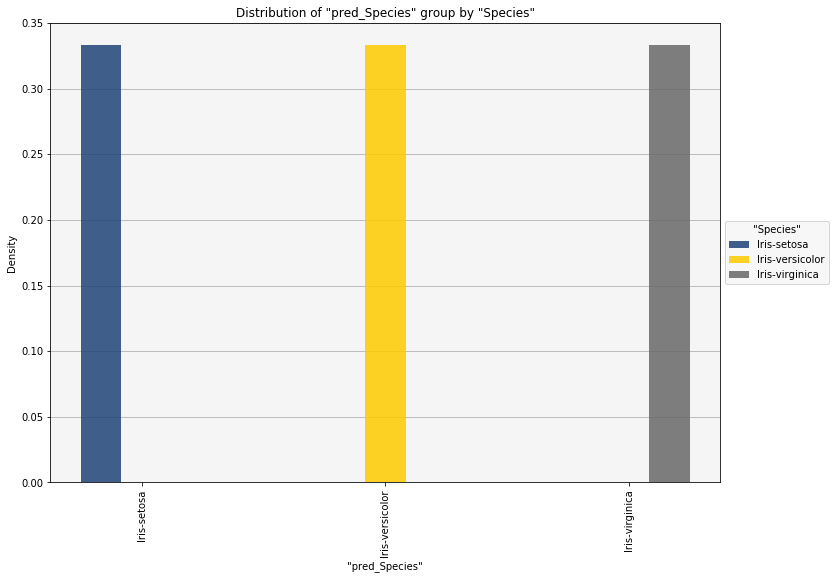

In [52]:
iris.hist(["pred_Species", "Species"])

Some Multiclass Classifiers have the possibility to evaluate the features importance.

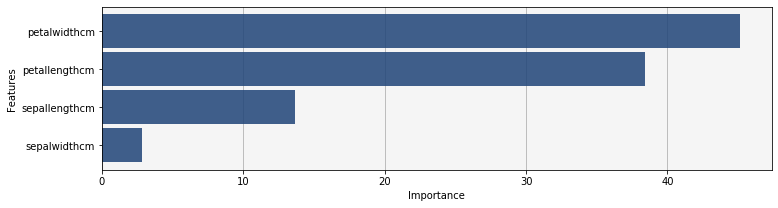

,importance
petalwidthcm,45.11
petallengthcm,38.44
sepallengthcm,13.65
sepalwidthcm,2.8


<object>

In [53]:
model.features_importance()

And to draw them.

In [54]:
model.plot_tree()

--------------------------------------------------------------------------------
Tree Id: 0
Number of Nodes: 11
Tree Depth: 5
Tree Breadth: 6
--------------------------------------------------------------------------------
[1] (petallengthcm < 1.921875 ?)
├── [2] => Iris-setosa (probability = 1.0)
└── [3] (petallengthcm < 4.871875 ?)
    ├── [6] => Iris-versicolor (probability = 1.0)
    └── [7] (petalwidthcm < 1.525000 ?)
        ├── [14] (sepallengthcm < 6.100000 ?)
        │   ├── [28] => Iris-virginica (probability = 1.0)
        │   └── [29] (sepallengthcm < 6.100000 ?)
        │       ├── [58] => Iris-virginica (probability = 1.0)
        │       └── [59] => Iris-versicolor (probability = 1.0)
        └── [15] => Iris-virginica (probability = 1.0)
